In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [9]:
a = np.arange(10)
a = np.delete(a, 0)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
a = np.random.random((3,4))
a

array([[0.63425307, 0.9404616 , 0.10141061, 0.54208564],
       [0.55489582, 0.00956025, 0.48389965, 0.04701944],
       [0.195945  , 0.56444666, 0.11064958, 0.80260851]])

In [17]:
a = []
for i in range(20):
    a.append(i)
a.append(1000)
print(a)
a[0:10], a[10:-1], a[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1000]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 1000)

In [8]:
b = np.delete(a, 1, axis=1)
b

array([[0.63425307, 0.10141061, 0.54208564],
       [0.55489582, 0.48389965, 0.04701944],
       [0.195945  , 0.11064958, 0.80260851]])

[ -3519896.  -6792470. -12746610.] [-2.349974e+09 -4.498883e+09 -8.297769e+09]


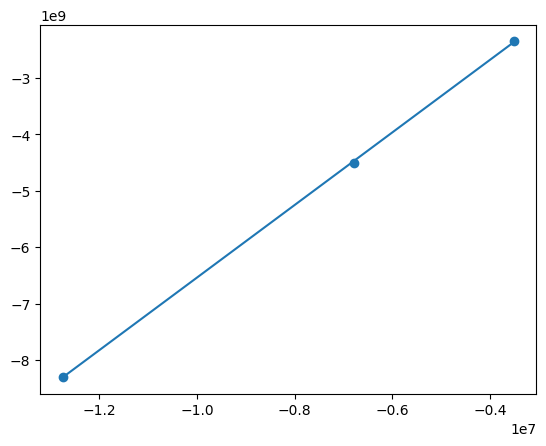

In [9]:
data = np.loadtxt('data/nu.dat')

x = data.T[1]
y = data.T[3]

xx = np.linspace(np.min(x), np.max(x), 100)

res = sps.linregress(x, y)

print(x, y)

plt.scatter(x, y)
plt.plot(xx, res.intercept + res.slope*xx)

Signature: sps.linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are available:

    * 'two-sided': the slope of the regression line is nonzero
    * 'less': the slope of the regression line is less than zero
    * 'greater':  the slope of the regression line is greater than zero

    .. versionadded:: 1.7.0


In [4]:
xx = np.linspace(0,1,100)
x = np.linspace(0,1,3)
y = np.linspace(0,1,3) + np.random.normal(1, 0.1, 3)

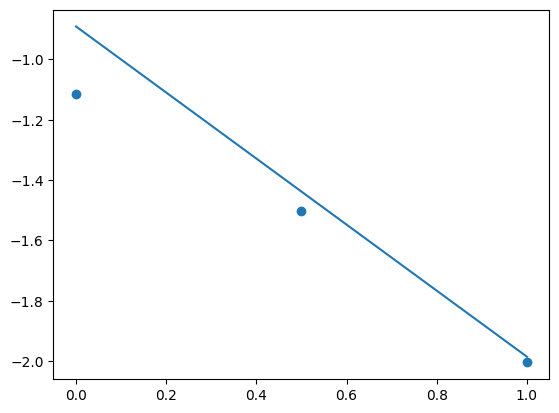

In [5]:
p = np.polyfit(x,-y,deg=1)

plt.scatter(x,-y)
plt.plot(xx, p[0]+p[1]*xx)

In [13]:
data.shape

(3, 4)

In [24]:
y = data.T[1:]

In [25]:
y[1]

array([4.257060e+08, 8.495340e+08, 1.705389e+09])

In [9]:
a = np.zeros((13,2))

In [11]:
a[5]

array([0., 0.])

In [1]:
import numpy as np
import sympy as sp
import itertools
import matplotlib.pyplot as plt
import string
from sympy import LeviCivita
from sympy.abc import symbols
from sympy import diff
from sympy import Matrix, matrix_multiply_elementwise

In [30]:
def levi_civita_tensor(dim): 
    """
    Compute the Levi-Civita tensor of rank dim in
    dim-dimensional space.

    Parameters
    ----------
    dim: INT
        The dimension of the space.

    Returns
    -------
    TENSOR
        A numpy array representing the Levi-Civita tensor.
        The tensor is a multi-dimensional array of shape (dim, dim, ..., dim).
    """
    arr=np.zeros([dim for _ in range(dim)])
    for x in itertools.permutations(range(dim)):
        mat = np.zeros((dim, dim), dtype=np.int32)
        for i, j in enumerate(x):
            mat[i][j] = 1
        arr[x]=int(np.linalg.det(mat))
    return arr

In [31]:
levi_civita_tensor(3)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0., -1.,  0.]],

       [[ 0.,  0., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  0.,  0.]],

       [[ 0.,  1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [32]:
def gen_einsum_string(n):
    """
    Generate a string of the form 'ij, abc, i, a, b, cj', to be
    used in the Einstein summation for the GKP formula.

    Parameters
    ----------
    n : INT
        Number of transitions.

    Returns
    -------
    einsum_str : STR

    """
    col_row_str = [] 
    transition_indices = ''.join(chr(105 + i) for i in range(n))
                # 'ijk...' for n
    isotope_pair_indices = ''.join(chr(97 + i) for i in range(n+1))
                # 'abc...' for n+1
    fixed_str = (transition_indices + ', ' + isotope_pair_indices 
                 + ', ' + 'i' + ', ' + 'a' + ', ' + 'b')
    
    
    for i in range(n-1):
        row_index = ''.join(chr(99 + i)) #'c'... for n-1
        col_index = ''.join(chr(106 + i)) #'j'... for n-1
        tot = row_index + col_index #'cj'
        col_row_str.append(tot) #'cj, dk,...' for n-1
    
    mat_indices_str = ', '.join(col_row_str)
    
    einsum_str = fixed_str + ', ' + mat_indices_str
    
    return einsum_str

In [33]:
gen_einsum_string(5)

'ijklm, abcdef, i, a, b, cj, dk, el, fm'